In [31]:
import numpy as np
import matplotlib.pyplot as plt

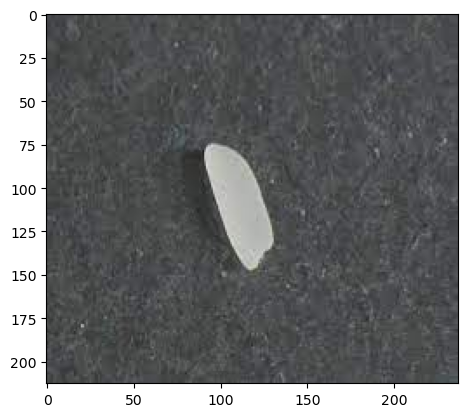

In [35]:
img = plt.imread('onerice.bmp')
plt.imshow(img)
plt.show()

In [36]:
def howis(img):
    print ('size = ', img.shape)
    print ('max =', np.max(img))
    print ('min =', np.min(img))

howis(img)

size =  (213, 237, 4)
max = 255
min = 20


size =  (213, 237)
max = 225
min = 20


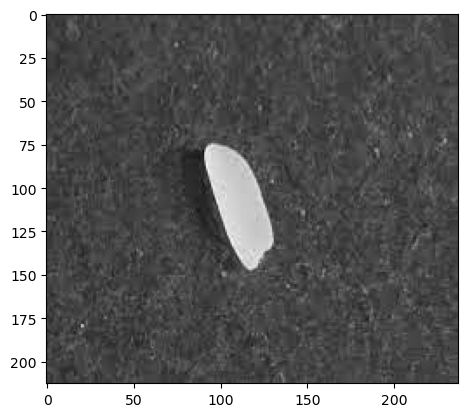

In [37]:
x = img[:,:,0]
howis(x)
plt.imshow(x, cmap='gray')
plt.show()

In [38]:
def segmenta(X,t):
    (N,M) = X.shape
    Y = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            if X[i,j] > t:
                Y[i,j] = 255
    return Y

size =  (213, 237)
max = 255.0
min = 0.0


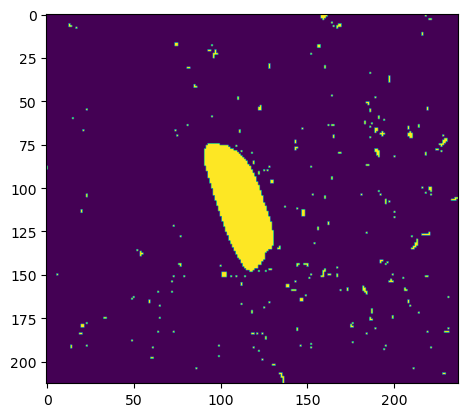

In [39]:
Y = segmenta(x, 100)
howis(Y)
plt.imshow(Y)
plt.show()

# Práctica 03 : Procesamiento de imágenes

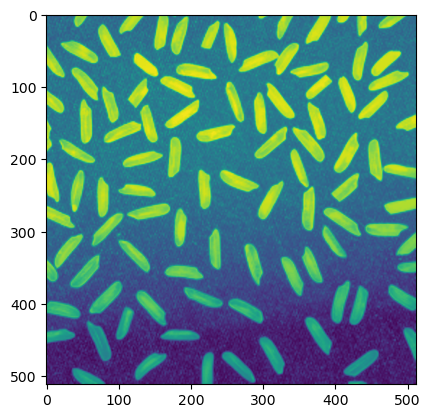

In [88]:
""" Ahora con la otra imagen """
I = plt.imread('rices.png')
plt.imshow(I)


### Importación de las librerías utilizadas

In [89]:
from skimage.io import imread
from skimage.morphology import disk
from skimage.filters import threshold_otsu
from skimage.morphology import binary_erosion, binary_dilation
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.color import label2rgb

### Creación del elemento estructurante
Se crea un elemento circular de radio 15 pixeles, que será utilizado más adelante en las operaciones morfológicas

In [90]:
selem = disk(15)

### Aplicación de la operación de apertura para obtener el fondo
Se aplica la operación de apertura para obtener el fondo de la imagen, el cual se obtiene al aplicar la operación de erosión y dilatación sobre la imagen original. Se utiliza el elemento estructurante creado anteriormente.

Primero, se aplica una erosión para eliminar los objetos pequeños y luego se aplica una dilatación para recuperar el tamaño original de los objetos.

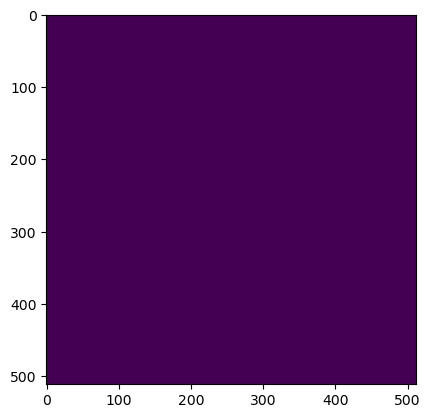

In [91]:
background = binary_erosion(I, selem)
background = binary_dilation(background, selem)
plt.imshow(background)

### Resta de la imagen original con el fondo
Se realiza la resta de la imagen original con el fondo obtenido en el paso anterior, para obtener los objetos de la imagen original.

In [92]:
I2 = I - background

### Ajustar el contraste de la imagen
Ajustamos los valores de pixeles en I2, restando el valor mínimo del pixel encontrado en I2. Esto se hace para que el valor mínimo de I2 sea 0.

Luego se escalan los valores resultantes de I2, dividiendo cada pixel entre el valor máximo de I2 y multiplicando por 255. Esto se hace para que el valor máximo de I2 sea 255.

In [93]:
I3 = I2 - np.min(I2)
I3 = I3 / np.max(I3)*255

## Umbralizacion de Otsu
Se aplica la umbralización de Otsu para obtener una imagen binaria, donde los pixeles con valor 0 corresponden al fondo y los pixeles con valor 255 corresponden a los objetos.

Luego creamos una imagen binaria bw donde los pixeles con valores mayores al umbral se establecen en 1 (objetos) y los pixeles con valores menores al umbral se establecen en 0 (fondo).

In [94]:
thresh = threshold_otsu(I3)
bw = I3 > thresh

### Eliminación de objetos pequeños y limpieza de bordes

Clear border elimina los objetos que tocan los bordes de la imagen.
También se aplican operaciones de dilatación y erosión para eliminar los objetos pequeños.

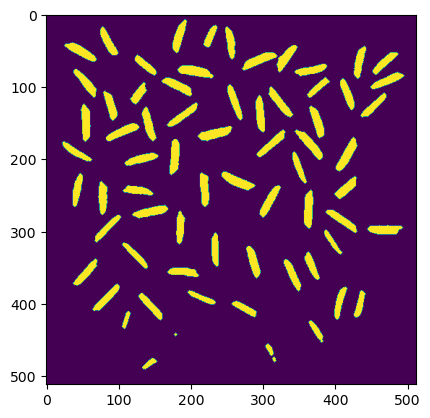

In [95]:
bw = clear_border(bw)
bw = binary_erosion(bw, disk(5))
bw = binary_dilation(bw, disk(2))
plt.imshow(bw)

## Etiqueta de regiones y resultados

Se etiquetan las regiones conectadas en la imagen binaria bw, para asignar un número único a cada objeto. Luego se crea una imagen de etiquetas superpuestas para visualizar las regiones etiquetadas en la imagen original.

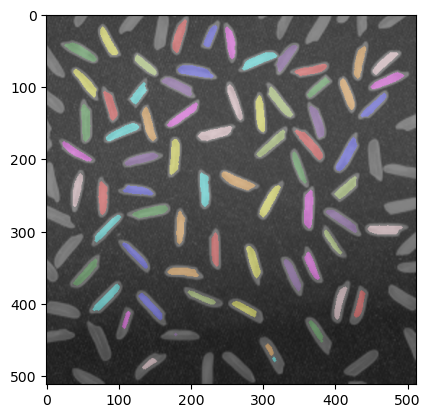

In [96]:
label_image = label(bw)
image_label_overlay = label2rgb(label_image, image=I, bg_label=0)
plt.imshow(image_label_overlay)

### Identificación de arroces

Creamos una figura y un eje para mostrar la imagen etiquetada con las regiones destacadas.

Luego, se recorren las regiones etiquetadas, dibujando un rectángulo rojo alrededor de las regiones grandes, por eso la expresión if (region.area >= 50).

Finalmente, se muestra la imagen con los rectángulos dibujados.



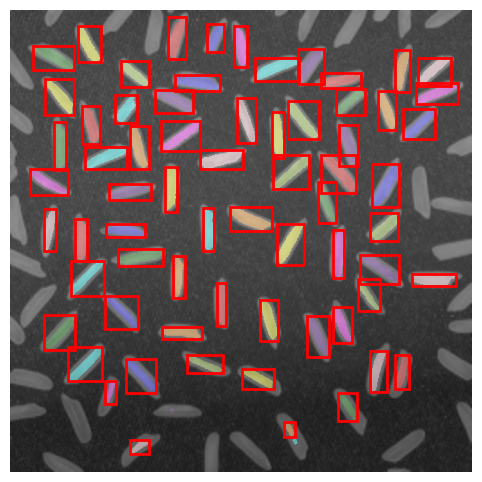

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    if region.area >= 100:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.show()